In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
V = np.array([[-2.69, -2.80], [-3.39, -4.56]])

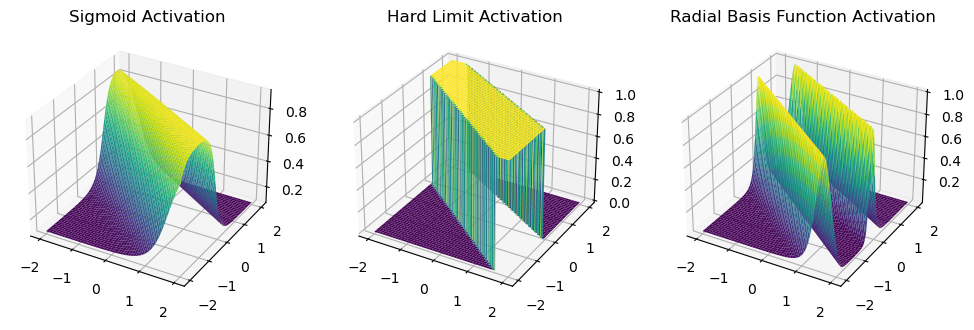

In [8]:
# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hard_limit(x):
    return np.where(x >= 0, 1, 0)

def radial_basis_function(x):
    return np.exp(-x**2)

# Create a grid of x1 and x2 values within the given domain
x1 = np.linspace(-2, 2, 10000)
x2 = np.linspace(-2, 2, 10000)
x1, x2 = np.meshgrid(x1, x2)

# Combine x1 and x2 to get all (x1, x2) pairs
x_pairs = np.vstack([x1.ravel(), x2.ravel()]).T

# Define the weight matrices and biases
VT = np.array([[-2.69, -2.80], [-3.39, -4.56]])
bv = np.array([-2.21, 4.76])
W = np.array([-4.91, 4.95])
bw = -2.28

# Initialize lists to store results for different activation functions
outputs_sigmoid = []
outputs_hard_limit = []
outputs_rbf = []

# Calculate the neural network's output for each pair
for x_pair in x_pairs:
    z_hidden = np.dot(x_pair, VT) + bv
    a_hidden = sigmoid(z_hidden)
    
    z_output = np.dot(a_hidden, W) + bw
    
    # Apply the activation functions
    outputs_sigmoid.append(sigmoid(z_output))
    outputs_hard_limit.append(hard_limit(z_output))
    outputs_rbf.append(radial_basis_function(z_output))

# Reshape the outputs to match the shape of x1 and x2
outputs_sigmoid = np.array(outputs_sigmoid).reshape(x1.shape)
outputs_hard_limit = np.array(outputs_hard_limit).reshape(x1.shape)
outputs_rbf = np.array(outputs_rbf).reshape(x1.shape)

# Create 3D surface plots for each activation function
fig = plt.figure(figsize=(12, 4))

# Sigmoid activation
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x1, x2, outputs_sigmoid, cmap='viridis')
ax1.set_title('Sigmoid Activation')

# Hard limit activation
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x1, x2, outputs_hard_limit, cmap='viridis')
ax2.set_title('Hard Limit Activation')

# Radial basis function activation
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x1, x2, outputs_rbf, cmap='viridis')
ax3.set_title('Radial Basis Function Activation')

plt.show()
